# Notebook 1: Exploratory Data Analysis

The objective of this project is to create an image classification model by classifying x-rays whether someone has pneumonia or not. THIS IS GOING TO BE A SIMPLE CLASSIFICATION MODEL

IM GONNA CREATE TWO DATASETS
ONE WITH PNEUMONIA NON PNEUMONIA

ONE IWTH BACTERIAL VIRAL AND NORMAL


In [1]:
import glob
import os
import shutil
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image

%matplotlib inline

The dataset has the following directory structure:

<pre>
<b>data</b>
|__ <b>train</b>
    |______ <b>PNEUMONIA</b>: [pneumonia_0.jpg, pneumonia_1.jpg, pneumonia_2.jpg ....]
    |______ <b>NORMAL</b>: [normal_0.jpg, normal_1.jpg, normal_2.jpg ...]
|__ <b>test</b>
    |______ <b>PNEUMONIA</b>: [pneumonia_0.jpg, pneumonia_1.jpg, pneumonia_2.jpg ....]
    |______ <b>NORMAL</b>: [normal_0.jpg, normal_1.jpg, normal_2.jpg ...]
</pre>

There are 5856 images in the total dataset

In [2]:
len(glob.glob('../data/*/*/*'))

5856

In [3]:
# There are 624 images in the test set
len(glob.glob('../data/test/*/*.jpeg'))

640

In [4]:
# there are 5216 in the training set
len(glob.glob('../data/train/*/*.jpeg'))

5216

In [5]:
# there are 16 in the validation set.
len(glob.glob('../data/val/*/*.jpeg'))

0

I'm going to combine the validation set with the test set.

In [6]:
source = glob.glob('../data/val/*/*')

In [7]:
for file in source:
    os.rename(file, file.replace('val', 'test'))

In [8]:
try:
    # delete subfolders first
    os.rmdir('../data/val/PNEUMONIA')
    os.rmdir('../data/val/NORMAL')
    # delete parent folder
    os.rmdir('../data/val/')
except:
    print('Folder has already been deleted.')

Folder has already been deleted.


Now I am going to rename the image files for both train and test folders.

In [9]:
# catcher = []

# for data_set in ['test', 'train']:
#     pneumonia_counter = 0
#     normal_counter = 0
#     for file in glob.glob(f'../data/{data_set}/*/*.jpeg'):
#         if 'pneumonia' in file.lower():
#             new_name = f'pneumonia_{pneumonia_counter}.jpeg'
#             renamed_image = '/'.join(file.split('/')[:-1])+'/'+ new_name
#             os.rename(file, renamed_image)
#             catcher.append(new_name)
#             pneumonia_counter += 1

#         else:
#             new_name = f'normal_{normal_counter}.jpeg'
#             renamed_image = '/'.join(file.split('/')[:-1])+'/'+ new_name
#             os.rename(file, renamed_image)
#             catcher.append(new_name)
#             normal_counter += 1

Now that we renamed the files, let's see our `class` distribution in our training dataset. Class 1 will be marked as pneumonia and class 0 will be marked as normal, because we are trying to identify pneumonia patients. I'm also going to add additional columns such as `c_type` and `pixel_size`.

In [10]:
training_imgs = glob.glob('../data/train/*/*.jpeg')

training_class = [1 if 'pneumonia' in file else 0 for file in training_imgs]
c_type = ['pneumonia' if 'pneumonia' in file else 'normal' for file in training_imgs]
pixel_dimension = [Image.open(file).size for file in training_imgs]
pixel_width = [width for width, height in pixel_dimension]
pixel_height = [height for width, height in pixel_dimension] 
pixel_total = [width*height for width, height in pixel_dimension]

train_df = pd.DataFrame({'image_file' : training_imgs,
                         'pixel_dimension' : pixel_dimension,
                         'pixel_width' : pixel_width,
                         'pixel_height' : pixel_height,
                         'pixel_total' : pixel_total,
                         'c_type' : c_type,
                         'class' : training_class,
                        })
train_df.shape

(5216, 7)

There are 5216 images and 2 classes.

In [11]:
train_df.head()

,image_file,pixel_dimension,pixel_width,pixel_height,pixel_total,c_type,class
0,../data/train/PNEUMONIA/pneumonia_2212.jpeg,"(437, 144)",437,144,62928,pneumonia,1
1,../data/train/PNEUMONIA/pneumonia_2642.jpeg,"(952, 664)",952,664,632128,pneumonia,1
2,../data/train/PNEUMONIA/pneumonia_3403.jpeg,"(1272, 872)",1272,872,1109184,pneumonia,1
3,../data/train/PNEUMONIA/pneumonia_395.jpeg,"(1416, 864)",1416,864,1223424,pneumonia,1
4,../data/train/PNEUMONIA/pneumonia_1594.jpeg,"(1528, 1152)",1528,1152,1760256,pneumonia,1


In [12]:
list(train_df['class'].value_counts())

[3875, 1341]

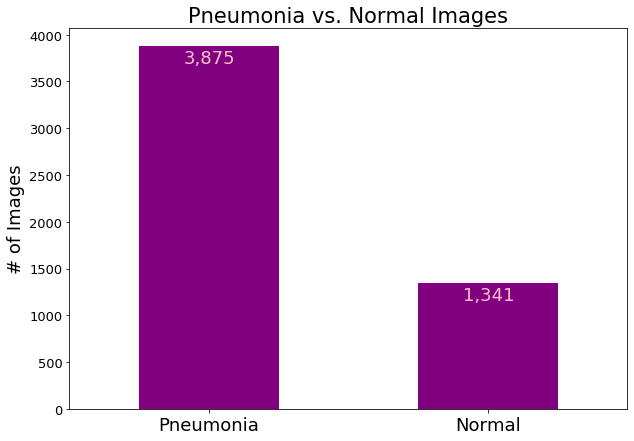

In [13]:
# Following code is adapted from http://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html

ax = train_df['class'].value_counts().plot(kind='bar', figsize=(10,7),
                                                  color="purple", fontsize=13);
ax.set_alpha(0.8)
ax.set_title('Pneumonia vs. Normal Images', fontsize=21)
ax.set_ylabel("# of Images", fontsize=18);
ax.set_xticklabels(['Pneumonia','Normal'], rotation=0, fontsize=18)

# create a list to collect the plt.patches data
totals = list(train_df['class'].value_counts())

# find the values and append to list
#for i in ax.patches:
#    totals.append(i.get_height())

# set individual bar lables using above list
#total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.16, i.get_height() - 180, "{:,}".format(round((i.get_height()), 2)), fontsize=18,color='pink')
    
    
plt.savefig('../plots/pneumonia_vs_normal.png')

As you can see, the classes are imbalanced which might cause the model to bias towards the majority class, which is pneumonia, and treat the normal images as noise. 

I will now look at the distribution of pixels in our images.

In [14]:
pneum_df = train_df[train_df['class'] == 1].reset_index(drop = True)
norm_df = train_df[train_df['class'] == 0].reset_index(drop = True)

In [15]:
train_df.head()

,image_file,pixel_dimension,pixel_width,pixel_height,pixel_total,c_type,class
0,../data/train/PNEUMONIA/pneumonia_2212.jpeg,"(437, 144)",437,144,62928,pneumonia,1
1,../data/train/PNEUMONIA/pneumonia_2642.jpeg,"(952, 664)",952,664,632128,pneumonia,1
2,../data/train/PNEUMONIA/pneumonia_3403.jpeg,"(1272, 872)",1272,872,1109184,pneumonia,1
3,../data/train/PNEUMONIA/pneumonia_395.jpeg,"(1416, 864)",1416,864,1223424,pneumonia,1
4,../data/train/PNEUMONIA/pneumonia_1594.jpeg,"(1528, 1152)",1528,1152,1760256,pneumonia,1


Normal's Average Pixel Size: 2390000
Pneumonia's Average Pixel Size: 1060000


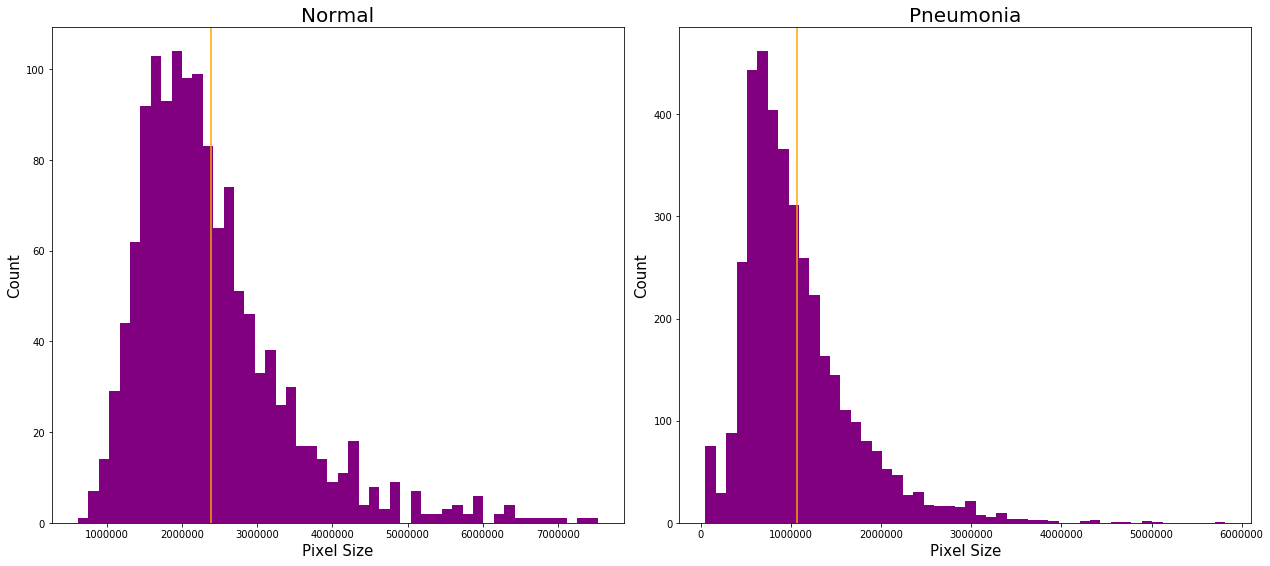

In [30]:
title = ['Normal', 'Pneumonia']

fig = plt.figure(figsize=(35,15))
for i, col in enumerate(title): # for index and column name 
    fig.add_subplot(2,4,1+i) # create subplots, use index to increment 
    col_data = train_df[train_df['class'] == i]['pixel_total']
    
    plt.hist(col_data, bins=50, color = 'purple')
    char_mean = col_data.mean()
    
    print(f"{title[i]}'s Average Pixel Size: {int(round(char_mean, -4))}")
    plt.axvline(char_mean, color = 'orange')
    
    plt.title(col, fontsize = 20)
    plt.xlabel('Pixel Size', fontsize = 15)
    plt.ylabel('Count', fontsize = 15)

    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)

plt.tight_layout()
plt.savefig('../plots/pixel_comparison.png', )

As you can see there is a pretty big difference in x-ray image sizes between normal and pneumonia images. The normal average pixel size is 2.4 million vs pneumonia's 1.1 million. Furthermore, some images are as small as 50,000 pixels and others as large as 7 million. As a result, I will normalize the pixel values and resize the images in the next notebook.

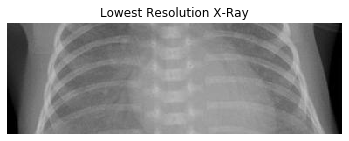

In [17]:
plt.title('Lowest Resolution X-Ray')
img = plt.imread(train_df.loc[train_df[train_df['pixel_total'] == train_df['pixel_total'].min()].index[0], 'image_file'])
plt.imshow(img, cmap = 'gray');
plt.axis('off');

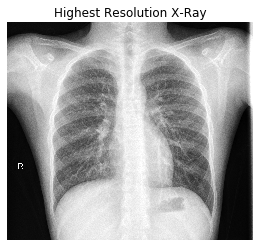

In [18]:
plt.title('Highest Resolution X-Ray')
img = plt.imread(train_df.loc[train_df[train_df['pixel_total'] == train_df['pixel_total'].max()].index[0], 'image_file'])
plt.imshow(img, cmap = 'gray');
plt.axis('off');

I will now examine a few images from both the normal and pneumonia x-rays to see whether there are an noticeable differences to an untrained eye.

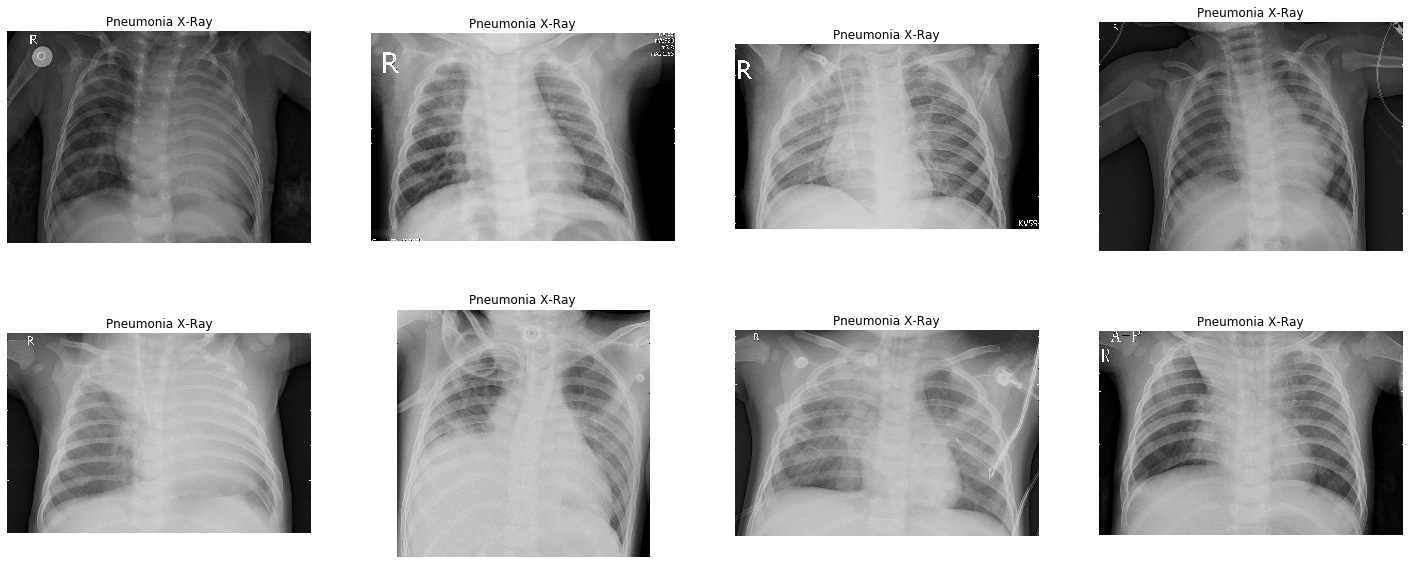

<Figure size 432x288 with 0 Axes>

In [31]:
# adapted from https://stackoverflow.com/questions/46615554/how-to-display-multiple-images-in-one-figure-correctly/46616645

fig = plt.figure(figsize=(25, 10));

rows, columns = 2, 4

for i in range(1, columns*rows +1):
    img = plt.imread(pneum_df.loc[i, 'image_file'])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap = 'gray')
    plt.title('Pneumonia X-Ray')
    plt.axis('off');
    
plt.show()
plt.tight_layout()
plt.savefig('../plots/pneumonia_xray.png')


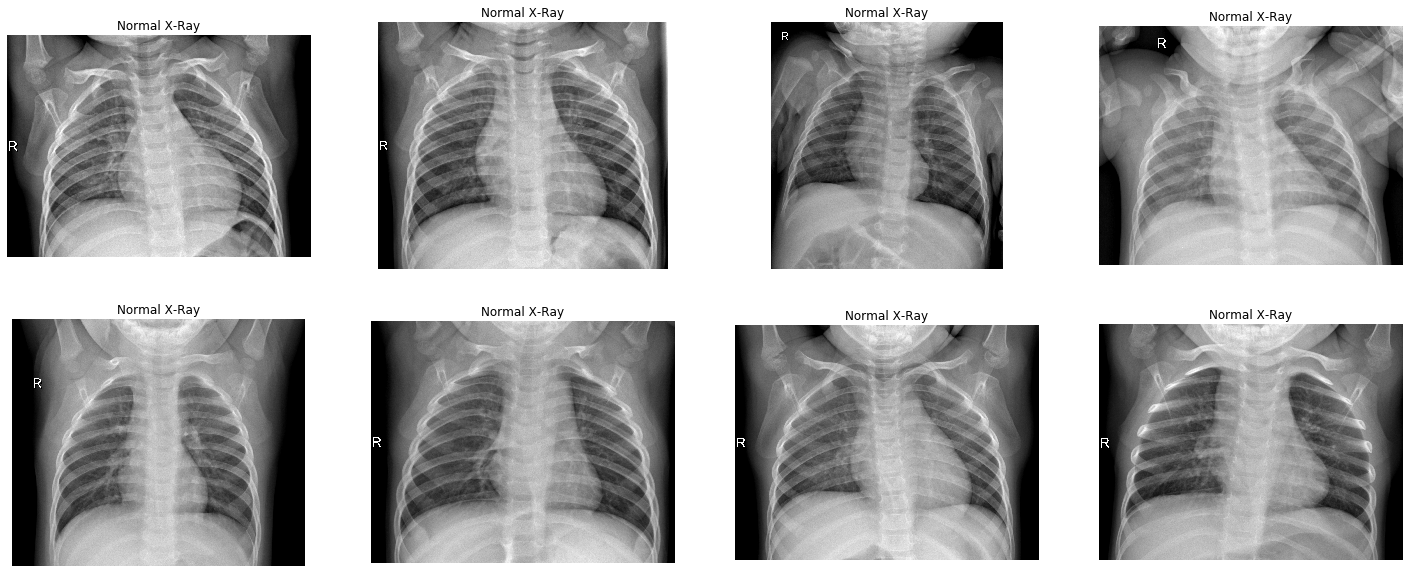

<Figure size 432x288 with 0 Axes>

In [32]:
fig = plt.figure(figsize=(25, 10));

rows, columns = 2, 4

for i in range(1, columns*rows +1):
    img = plt.imread(norm_df.loc[i, 'image_file']);
    fig.add_subplot(rows, columns, i);
    plt.imshow(img, cmap = 'gray');
    plt.title('Normal X-Ray');
    plt.axis('off');
    
plt.show();
plt.tight_layout()
plt.savefig('../plots/normal_xray.png');

I am not a radiologist, but I can comment on some observations. There are certain letters such as 'R' and 'k', and I wonder whether that will assist or impair the model from learning patterns to distinguish normal and pneumonia patients. Furthermore, it seems like there is more 'cloudiness' that fill up the volume within the ribcage for pneumonia patients. The cloudiness is most likely related to the water content in pneumonia patients. It also appears that normal patients have a brighter and whiter ribcages along their edges than their pneumonia counterparts.